<a href="https://colab.research.google.com/github/rogeriomsilveira/fundamentos_em_python/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação das bibliotecas que serão utilizadas

In [ ]:
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Exemplo do passo a passo do K-Means
Criação do conjunto de dados utilizado como exemplo no passo a passo

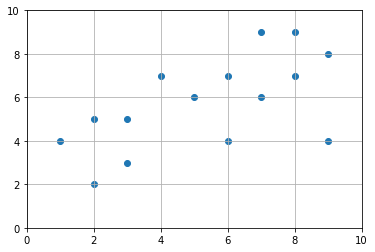

In [ ]:
dataset = np.array([[1, 4], [2, 2], [2, 5], [3, 3], [3, 5], [4, 7], [5, 6], [6, 4], [6, 7], [7, 6], [7, 9], [8, 7], [8, 9], [9, 4], [9, 8]]) 

plt.scatter(dataset[:,0], dataset[:,1])
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid()

Utilizando a biblioteca KMeans, encontramos 3 clusters no conjunto de dados definido. O parâmetro `init` define a estratégia utilizada para inicialização dos centroides. O valor `k-means++` é um algoritmo interno da biblioteca para uma definição mais assertiva dos centroides, utilizando nesse algoritmo também o parâmetro `n_init`.

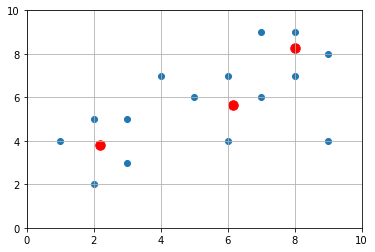

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(dataset)

plt.scatter(dataset[:,0], dataset[:,1])
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid()

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=90, c='red')
plt.show()

In [ ]:
plt.scatter(dataset[:,0], dataset[:,1], c=pred_y)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid()

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='red')
plt.show()

# Exemplo com dados aleatórios

In [ ]:
X, y = make_blobs(n_samples=1000, centers=3, random_state=100)
plt.scatter(X[:,0], X[:,1])

In [ ]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [ ]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

In [ ]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
n = optimal_number_of_clusters(wcss)
print(n)

In [ ]:
kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()